# PISA Data Exploration
## by Taichi Nakatani

## Preliminary Wrangling

> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.


> Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

In [27]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [28]:
pisa = pd.read_csv('pisa2012.csv', encoding='latin1')

In [29]:
# check data structure
pd.set_option('display.max_columns', 500)
pisa.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,...,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUDREL,ANCSUBNORM,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1MACC,PV2MACC,PV3MACC,PV4MACC,PV5MACC,PV1MACQ,PV2MACQ,PV3MACQ,PV4MACQ,PV5MACQ,PV1MACS,PV2MACS,PV3MACS,PV4MACS,PV5MACS,PV1MACU,PV2MACU,PV3MACU,PV4MACU,PV5MACU,PV1MAPE,PV2MAPE,PV3MAPE,PV4MAPE,PV5MAPE,PV1MAPF,PV2MAPF,PV3MAPF,PV4MAPF,PV5MAPF,PV1MAPI,PV2MAPI,PV3MAPI,PV4MAPI,PV5MAPI,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,W_FSTUWT,W_FSTR1,W_FSTR2,W_FSTR3,W_FSTR4,W_FSTR5,W_FSTR6,W_FSTR7,W_FSTR8,W_FSTR9,W_FSTR10,W_FSTR11,W_FSTR12,W_FSTR13,W_FSTR14,W_FSTR15,W_FSTR16,W_FSTR17,W_FSTR18,W_FSTR19,W_FSTR20,W_FSTR21,W_FSTR22,W_FSTR23,W_FSTR24,W_FSTR25,W_FSTR26,W_FSTR27,W_FSTR28,W_FSTR29,W_FSTR30,W_FSTR31,W_FSTR32,W_FSTR33,W_FSTR34,W_FSTR35,W_FSTR36,W_FSTR37,W_FSTR38,W_FSTR39,W_FSTR40,W_FSTR41,W_FSTR42,W_FSTR43,W_FSTR44,W_FSTR45,W_FSTR46,W_FSTR47,W_FSTR48,W_FSTR49,W_FSTR50,W_FSTR51,W_FSTR52,W_FSTR53,W_FSTR54,W_FSTR55,W_FSTR56,W_FSTR57,W_FSTR58,W_FSTR59,W_FSTR60,W_FSTR61,W_FSTR62,W_FSTR63,W_FSTR64,W_FSTR65,W_FSTR66,W_FSTR67,W_FSTR68,W_FSTR69,W_FSTR70,W_FSTR71,W_FSTR72,W_FSTR73,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_

In [30]:
pisa.shape

(485490, 636)

### What is the structure of your dataset?
The data set is quite massive with around 50,000 rows and approximately 600 columns. Trying to wrangle a dataset this large would be cumbersome, so we should filter down to specific columns we are interested in working with.

### What is/are the main feature(s) of interest in your dataset?
I'm interested in exploring two avenues:
1. Cultural background of the student, and how that correlates with scores.
2. Out-of-school study time, and how that correlates with scores.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The data set is quite massive, thus we should filter down to specific columns we are interested in working with.

Some columns I am interested in exploring:
- CNT     : Country
- ST03Q02 : Birth year
- ST04Q01 : Gender
- AGE     : Age
- ST11Q01 : At Home - Mother
- ST11Q02 : At Home - Father
- ST20Q01 : Country of Birth International - Self
- ST20Q02 : Country of Birth International - Mother
- ST20Q03 : Country of Birth International - Father
- ST25Q01 : International Language at Home
- ST08Q01 : Truancy - Late for School
- OUTHOURS : Out-of-School Study Time (Out-of-school study time per week)
- PV1MATH ~ PV5MATH : Plausible Math Scores. This will need a new column with an average.
- PV1READ ~ PV5READ : Plausible Reading Scores. This will need a new column with an average.
- PV1SCIE ~ PV5SCIE : Plausible Science Scores. This will need a new column with an average.

In [31]:
# create a subset of PISA data frame for ease of use
pisa_sub = pisa[[
    'CNT',
    'ST03Q02',
    'ST04Q01',
    'AGE',
    'ST11Q01',
    'ST11Q02',
    'ST20Q01',
    'ST20Q02',
    'ST20Q03',
    'ST25Q01',
    'ST08Q01',
    'PV1MATH',
    'PV2MATH',
    'PV3MATH',
    'PV4MATH',
    'PV5MATH',    
    'PV1READ',
    'PV2READ',
    'PV3READ',
    'PV4READ',
    'PV5READ',
    'PV1SCIE',
    'PV2SCIE',
    'PV3SCIE',
    'PV4SCIE',
    'PV5SCIE',
    'OUTHOURS'
]].copy()

In [32]:
# rename columns for legibility
pisa_sub.rename(columns={
    'CNT' : 'country',
    'ST03Q02' : 'birth_year',
    'ST04Q01' : 'gender',
    'AGE' : 'age',
    'ST11Q01' : 'mother_at_home',
    'ST11Q02' : 'father_at_home',
    'ST20Q01' : 'intl_birth_self',
    'ST20Q02' : 'intl_birth_mother',
    'ST20Q03' : 'intl_birth_father',
    'ST25Q01' : 'intl_language_at_home',
    'ST08Q01' : 'truancy_late',
    'OUTHOURS': 'outside_study_time'
}, inplace = True)

In [33]:
# check datatypes - outside_study_time will need to be converted
pisa_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 27 columns):
country                  485490 non-null object
birth_year               485490 non-null int64
gender                   485490 non-null object
age                      485374 non-null float64
mother_at_home           460559 non-null object
father_at_home           441036 non-null object
intl_birth_self          476363 non-null object
intl_birth_mother        472518 non-null object
intl_birth_father        469141 non-null object
intl_language_at_home    465496 non-null object
truancy_late             479143 non-null object
PV1MATH                  485490 non-null float64
PV2MATH                  485490 non-null float64
PV3MATH                  485490 non-null float64
PV4MATH                  485490 non-null float64
PV5MATH                  485490 non-null float64
PV1READ                  485490 non-null float64
PV2READ                  485490 non-null float64
PV3READ           

In [34]:
# inital check for null and missing values
for column in pisa_sub.columns:
    if (pisa_sub[column].isna().sum() > 0):
        print((column) + '  ' + str(pisa_sub[column].isna().sum()))

age  116
mother_at_home  24931
father_at_home  44454
intl_birth_self  9127
intl_birth_mother  12972
intl_birth_father  16349
intl_language_at_home  19994
truancy_late  6347
outside_study_time  176691


There are quite a lot of missing and NaN's in here. Let's see if we can mitigate this.

In [35]:
# convert NaN's in age column with average student age.
pisa_sub.loc[np.isfinite(pisa_sub['age']) == False, 'age'] = pisa_sub['age'].mean()

In [36]:
# convert outside_study_time missing data to 0
pisa_sub['outside_study_time'] = pisa_sub['outside_study_time'].fillna(0, inplace=False)

In [37]:
# drop other rows with missing values
pisa_sub = pisa_sub.dropna()

In [38]:
# convert outside_study_time from object to int32
pisa_sub['outside_study_time'] = pisa_sub['outside_study_time'].astype('int32')

In [39]:
# get average scores from plausible values
pisa_sub['math_avg'] = pisa_sub[['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH']].mean(axis=1)
pisa_sub['read_avg'] = pisa_sub[['PV1READ','PV2READ','PV3READ','PV4READ','PV5READ']].mean(axis=1)
pisa_sub['scie_avg'] = pisa_sub[['PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']].mean(axis=1)

In [40]:
# get average of all averages, ie. a total score factoring math, reading and science
pisa_sub['score_avg'] = pisa_sub[['math_avg','read_avg','scie_avg']].mean(axis=1)

In [41]:
# drop individual score columns
pisa_sub = pisa_sub.drop(['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH',
               'PV1READ','PV2READ','PV3READ','PV4READ','PV5READ',
               'PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE'],axis=1)

Additionally, I wanted to explore a bit more with family structure and test scores.  To achieve this I feature engineered a new column based on the entries in the 'mother_at_home' and 'father_at_home' columns.

In [42]:
# feature engineer a new column showing family structure
def parent_check(row):
    if row['mother_at_home'] == 'Yes' and row['father_at_home'] == 'Yes':
        return 'Both Parent at Home'
    elif row['mother_at_home'] == 'Yes' and row['father_at_home'] == 'No':
        return 'Single Parent at Home'
    elif row['mother_at_home'] == 'No' and row['father_at_home'] == 'Yes':
        return 'Single Parent at Home'    
    else:
        return 'No Parent at Home'
    
pisa_sub['parents_at_home'] = pisa_sub.apply(parent_check, axis=1)

In [43]:
# check output
pisa_sub.sample(10)

,country,birth_year,gender,age,mother_at_home,father_at_home,intl_birth_self,intl_birth_mother,intl_birth_father,intl_language_at_home,truancy_late,outside_study_time,math_avg,read_avg,scie_avg,score_avg,parents_at_home
158753,Spain,1996,Female,16.25,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,12,543.78408,543.07378,533.88664,540.248167,Both Parent at Home
368789,New Zealand,1996,Male,15.75,Yes,No,Country of test,Country of test,Other country,Language of the test,None,0,458.33464,511.06132,534.91234,501.436100,Single Parent at Home
13714,United Arab Emirates,1996,Male,15.33,Yes,Yes,Other country,Other country,Other country,Other language,None,0,564.65960,509.69802,512.34612,528.901247,Both Parent at Home
155277,Spain,1996,Female,15.67,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,0,353.87910,309.54658,375.36370,346.263127,Both Parent at Home
204306,Greece,1996,Male,15.42,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,2,443.45692,453.80246,457.60910,451.622827,Both Parent at Home
97218,Switzerland,1996,Female,16.00,Yes,Yes,Country of test,Other country,Country of test,Language of the test,None,6,590.83190,577.38798,561.30178,576.507220,Both Parent at Home
160124,Spain,1996,Female,15.50,Yes,Yes,Other country,Other country,Other country,Other language,One or two times,12,337.20984,330.99296,358.76540,342.322733,Both Parent at Home
216362,Croatia,1996,Male,15.42,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,One or two times,12,616.14740,587.80750,594.31182,599.422240,Both Parent at Home
109258,Chile,1997,Female,15.33,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,8,476.25018,506.29720,449.58972,477.379033,Both Parent at Home
228898,Ireland,1996,Male,16.00,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,0,564.42592,573.13188,638.79150,592.116433,Both Parent at Home


### Further Wranglings in the Dataset
While working with the dataset, more issues pop up.  This section shows extra steps taken to wrangle suspicious data.

Observing the 'outside_study_time' column, I noticed there are really high outlier numbers that seem unusual given that this is time spent per week. Upon examining the USA and Japan datasets, we see that there are 125 and 33 entries where the reported study time was over 30 hours respectively.

I decided to remove these outlier values so as not to unexpectedly skew the dataset.

In [44]:
# check suspicious data in outside_school_study_time
study_time_check = pisa_sub[pisa_sub.outside_study_time > 30]
study_time_check['outside_study_time'].sort_values(ascending=False).head()

67097     180
286798    180
64079     180
475076    180
148694    180
Name: outside_study_time, dtype: int32

In [45]:
# check amount of suspicious data
print(study_time_check['outside_study_time'].shape[0])

13642


In [46]:
# create new datasets to remove these outlier numbers, setting a threshold at 30 hours.
pisa_sub = pisa_sub[pisa_sub.outside_study_time < 30]

## Datasets

For this analysis, I am going to filter down to analyzing data from certain countries I'm interested.  I believe this will also filter down unknown factors that may affect the outcome of the analysis as well (ie. quality of data in certain countries).

For the exploration, I will use several datasets:
1. pisa_sub = Global dataset (all countries)
3. pisa_usajp = Dataframe filtered down to just USA and Japan

In [47]:
# create USA/JP dataset
pisa_usajp = pisa_sub[pisa_sub.country.isin(["United States of America", "Japan"])]

In [48]:
pisa_usajp.sample(100)

,country,birth_year,gender,age,mother_at_home,father_at_home,intl_birth_self,intl_birth_mother,intl_birth_father,intl_language_at_home,truancy_late,outside_study_time,math_avg,read_avg,scie_avg,score_avg,parents_at_home
477017,United States of America,1997,Female,15.42,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,12,493.23102,557.60964,546.75494,532.531867,Both Parent at Home
284851,Japan,1996,Female,16.17,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,3,588.33932,622.26650,609.69786,606.767893,Both Parent at Home
479322,United States of America,1996,Female,16.08,Yes,No,Other country,Other country,Other country,Other language,None,8,361.82426,354.50456,372.93920,363.089340,Single Parent at Home
480414,United States of America,1996,Male,16.17,Yes,No,Country of test,Country of test,Country of test,Language of the test,None,0,498.52780,516.19378,532.67436,515.798647,Single Parent at Home
475922,United States of America,1997,Male,15.50,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,0,454.05046,478.98354,485.95674,472.996913,Both Parent at Home
478597,United States of America,1996,Female,15.92,Yes,Yes,Country of test,Other country,Other country,Other language,None,0,482.71538,503.43770,444.64752,476.933533,Both Parent at Home
478515,United States of America,1997,Female,15.58,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,0,420.32248,456.49398,392.80118,423.205880,Both Parent at Home
475718,United States of America,1996,Male,15.92,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,One or two times,15,459.58094,460.21800,458.26186,459.353600,Both Parent at Home
282328,Japan,1996,Male,15.92,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,Three or four times,1,494.63310,427.73924,516.16932,479.513887,Both Parent at Home
279796,Japan,1996,Female,16.08,Yes,Yes,Country of test,Country of test,Country of test,Language of the test,None,4,543.70618,535.36896,530.43642,536.503853,Both Parent at Home


## Univariate Exploration

### Distribution of Scores (Global Dataset)

We will begin with analyzing the distribution of average scores.

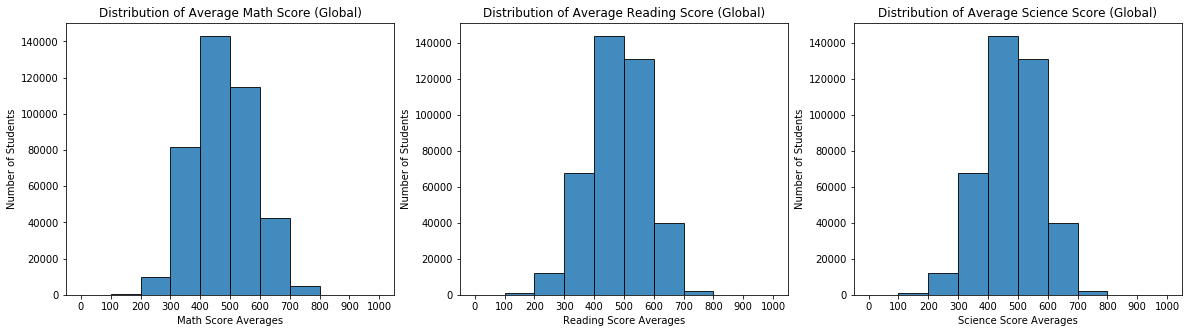

In [49]:
plt.figure(figsize = [20, 5])

# Math score
plt.subplot(1, 3, 1)
bins_hist = np.arange(0, 1000 + 1, 100)

plt.hist(pisa_sub['math_avg'], bins = bins_hist, ec = 'black', alpha = 0.85);
plt.xticks(bins_hist)
plt.xlabel('Math Score Averages');
plt.ylabel('Number of Students')
plt.title("Distribution of Average Math Score (Global)");

# Reading score
plt.subplot(1, 3, 2)

plt.hist(pisa_sub['read_avg'], bins = bins_hist, ec = 'black', alpha = 0.85);
plt.xticks(bins_hist)
plt.xlabel('Reading Score Averages');
plt.ylabel('Number of Students')
plt.title("Distribution of Average Reading Score (Global)");

# Science score
plt.subplot(1, 3, 3)

plt.hist(pisa_sub['read_avg'], bins = bins_hist, ec = 'black', alpha = 0.85);
plt.xticks(bins_hist)
plt.xlabel('Science Score Averages');
plt.ylabel('Number of Students')
plt.title("Distribution of Average Science Score (Global)");

From the above histogram, we see that:
- For all three score averages, we see a smooth unimodal distribution of values.
- The highest concentration of scores rests between 400 and 500.
- We see that there are small concentration of scores between 100~200, and 700~800.

### Distribution of Hours Spent Studying Outside of School (Global)

Let's see how the hours spent studying outside of school is distributed on a global level.

Note that the initial observation showed extreme outliers in the data, so I had to go back to data wrangling mode to filter those values out.

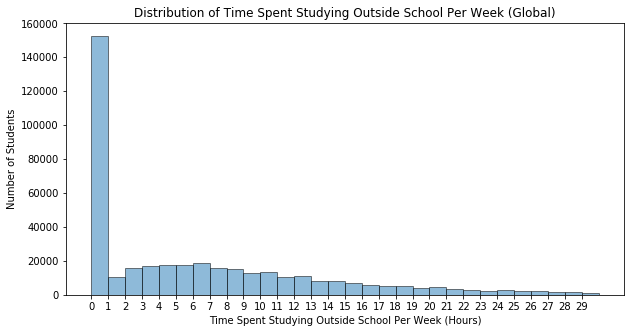

In [50]:
# plot distribution
plt.figure(figsize=(10,5))
bins_hist = np.arange(0, 30 + 1, 1)
plt.hist(data=pisa_sub, x = 'outside_study_time', bins = bins_hist, alpha = 0.5, ec='black');
plt.xticks(np.arange(0,30,1))
plt.xlabel('Time Spent Studying Outside School Per Week (Hours)');
plt.ylabel('Number of Students');
plt.title('Distribution of Time Spent Studying Outside School Per Week (Global)');

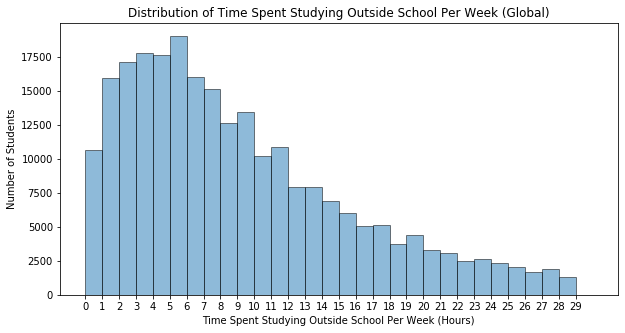

In [51]:
# zero time spent outside is the predominant answer, so let's see the distribution
# when some time spent studying was mentioned:

plt.figure(figsize=(10,5))
bins_hist = np.arange(0.001, 30 + 1, 1)
plt.hist(data=pisa_sub, x = 'outside_study_time', bins = bins_hist, alpha = 0.5, ec='black');
plt.xticks(np.arange(0,30,1))
plt.xlabel('Time Spent Studying Outside School Per Week (Hours)');
plt.ylabel('Number of Students');
plt.title('Distribution of Time Spent Studying Outside School Per Week (Global)');

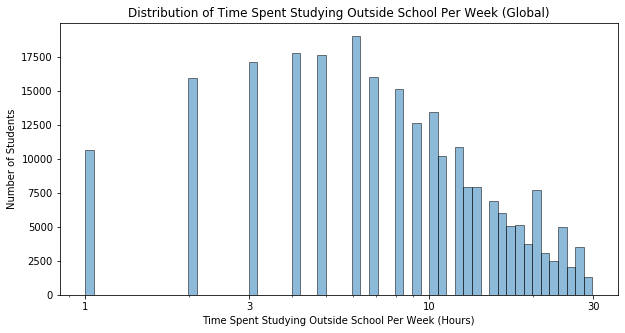

In [56]:
# try a logarithmic plot
plt.figure(figsize=(10,5))

log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(pisa_sub['outside_study_time'].max())+log_binsize, log_binsize)

plt.hist(data=pisa_sub, x = 'outside_study_time', bins = bins, alpha = 0.5, ec='black');
plt.xscale('log')
plt.xticks([1, 3, 10, 30], ['1', '3', '10', '30'])
plt.xlabel('Time Spent Studying Outside School Per Week (Hours)');
plt.ylabel('Number of Students');
plt.title('Distribution of Time Spent Studying Outside School Per Week (Global)');

Some observations from the charts:

- On the whole, the initial chart shows that the majority of students report that they do not spend any time outside of school for studying.
- Filtering down to entries where there is some amount of time spent studying outside of school reported creates a chart that is easier to read.  Factoring out the zeros, the distribution appears unimodal with heavy skew to the right and a long tail.  
- The time spent studying outside of school appears to have the highest concentration around 5-6 hours.

It would be interesting to see how this factor correlates with the average scores as well as trends with countries.  We'll observe how the distributions are affected by country later.

## Bivariate Exploration

### Study Time versus Score (Global)

My first interest is to see if there is any interesting insights from exploring study time data and score data.  
Since there is a lot of data, I chose to go with a heatmap.

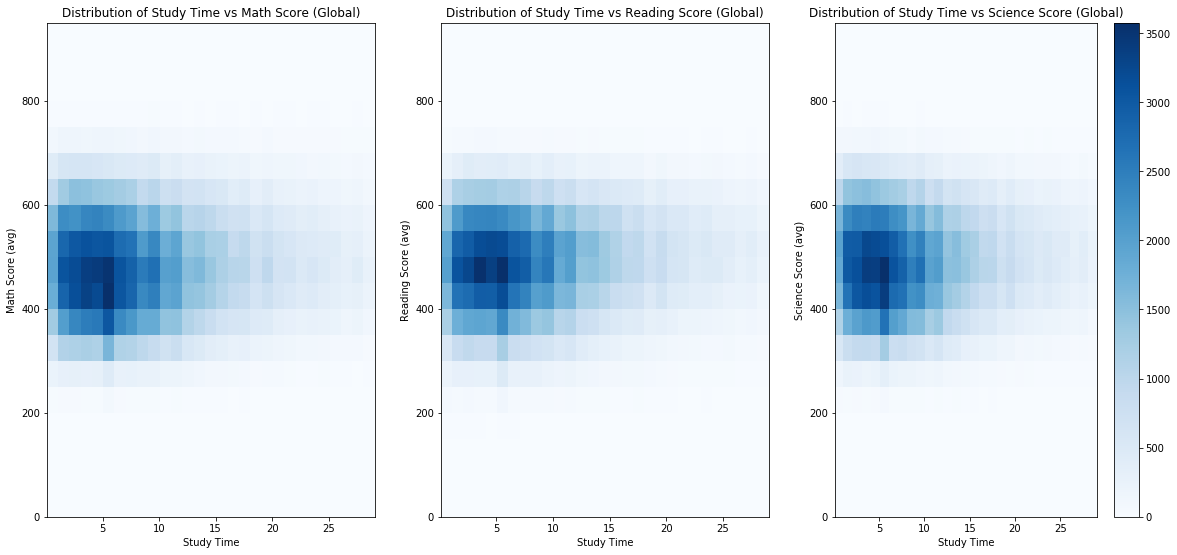

In [57]:
plt.figure(figsize=(20,20))

# chart heatmap between study time and average scores
plt.subplot(2, 3, 1)
bins_x = np.arange(0.1, 30, 1)
bins_y = np.arange(0, 1000, 50)

plt.hist2d(data = pisa_sub, x = 'outside_study_time', y = 'math_avg',
          bins = [bins_x, bins_y], cmap='Blues')
plt.xlabel('Study Time');
plt.ylabel('Math Score (avg)');
plt.title('Distribution of Study Time vs Math Score (Global)');

# chart heatmap between study time and average score
plt.subplot(2, 3, 2)

plt.hist2d(data = pisa_sub, x = 'outside_study_time', y = 'read_avg',
          bins = [bins_x, bins_y], cmap='Blues')
plt.xlabel('Study Time');
plt.ylabel('Reading Score (avg)');
plt.title('Distribution of Study Time vs Reading Score (Global)');

# chart heatmap between study time and average score
plt.subplot(2, 3, 3)

plt.hist2d(data = pisa_sub, x = 'outside_study_time', y = 'scie_avg',
          bins = [bins_x, bins_y], cmap='Blues')
plt.xlabel('Study Time');
plt.ylabel('Science Score (avg)');
plt.title('Distribution of Study Time vs Science Score (Global)');
plt.colorbar();

Some observations from the chart:
- Per the histogram chart from the previous section, most students responded with 
- The heat chart suggests that the most students generally spend around 5 hours of outside study per week, and scores between the 400 and 600 mark.
- There doesn't seem to be much of a correlation between study time and test scores as much as I'd expected.  In general the chart reflects the general bell curve of scores and the rarity of study time spent over 10 hours.

## Language Spoken at Home vs Reading Score (Global)

Another topic I'm interested in seeing the correlation between families who speak an international language at home versus the native language, and if that has any correlation to reading scores.

In this case, I'll only observe the US dataset since Japan is a relatively monolingual nation.

In [58]:
# remove missing variables first
intnl_lang_at_home = pisa_sub[pisa_sub['intl_language_at_home'] != "Missing"]

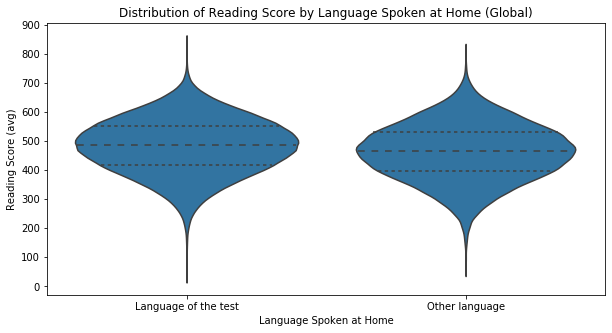

In [71]:
# create violin plot
base_color = sb.color_palette()[0]
plt.figure(figsize=(10,5))
s = sb.violinplot(data = intnl_lang_at_home, x = 'intl_language_at_home', y = 'read_avg',
              color = base_color, inner='quartile');
s.set_yticks(np.arange(0,1000,100))
plt.title('Distribution of Reading Score by Language Spoken at Home (Global)');
plt.xlabel('Language Spoken at Home');
plt.ylabel('Reading Score (avg)');

Observations from the chart:
- As imagined, students who speaks a different language at home than the language tested generally has lower distribution of scores compared to those who speak the language of the test at home.
- The shape of the distribution is similar between the two.
- Those who speak the language of the test at home generally peak around 500 and 550, while those who speak another language is slightly closer to 400.

## Family Structure vs Average Score (Global)
Let's explore the correlation of family structure versus test scores.

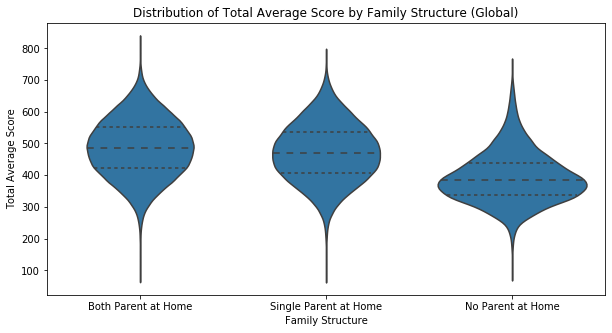

In [60]:
# create violin plot
base_color = sb.color_palette()[0]
plt.figure(figsize=(10,5))

variables = ['Both Parent at Home', 'Single Parent at Home', 'No Parent at Home'];

v = sb.violinplot(data = intnl_lang_at_home, x = 'parents_at_home', y = 'score_avg',
              color = base_color, order = variables, inner = 'quartile');
plt.title('Distribution of Total Average Score by Family Structure (Global)');
plt.xlabel('Family Structure');
plt.ylabel('Total Average Score');

Observations from the chart:
- The chart shows that the median distribution is higher for students where both parents are at home versus single parent or no parent for math and reading scores.  
- There is a decidedly smaller difference between having both parents at home and a single parent at home than I personally expected.  They both have a high concentration of students who have an average score in the high 500.
- Compare to the smaller difference between both parent and single parent family structure, having no parent at home significantly lowers the average scores of the student, where the mean is down to ~400.

## Multivariate Exploration

### Correlation of Scores

The first point of analysis I'd like to do is to see whether having a high score on one test positively correlates to having high scores on another test.  In this case, 

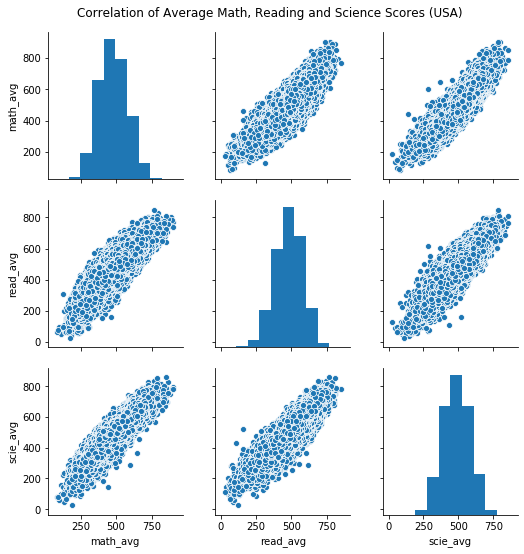

In [61]:
# create a plot matrix
grid_usa = sb.pairplot(data = pisa_sub, vars=["math_avg", "read_avg", "scie_avg"]);
grid_usa.fig.suptitle("Correlation of Average Math, Reading and Science Scores (USA)", y = 1.02);

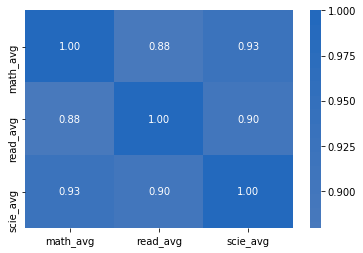

In [62]:
# create a correlation matrix
pisa_scores = pisa_sub[['math_avg','read_avg','scie_avg']]
sb.heatmap(pisa_scores.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

Observations from the chart:
- The data show the expected outcome, where there is a strong correlation between any pair of test score averages.  This is further evidenced by the correlation matrix, where all variable pairs have a correlation of around 0.9.
- While all of the correlation is high, there is a slightly lower correlation between reading and math scores.  Judging by the data in the chart the order of correlation strength (from strongest to weakest) is as follows:
    1. Math and Science
    2. Reading and Science
    3. Math and Reading

### Distribution of Scores by Country
Let's explore the distribution of scores using another categorical variable: Country.

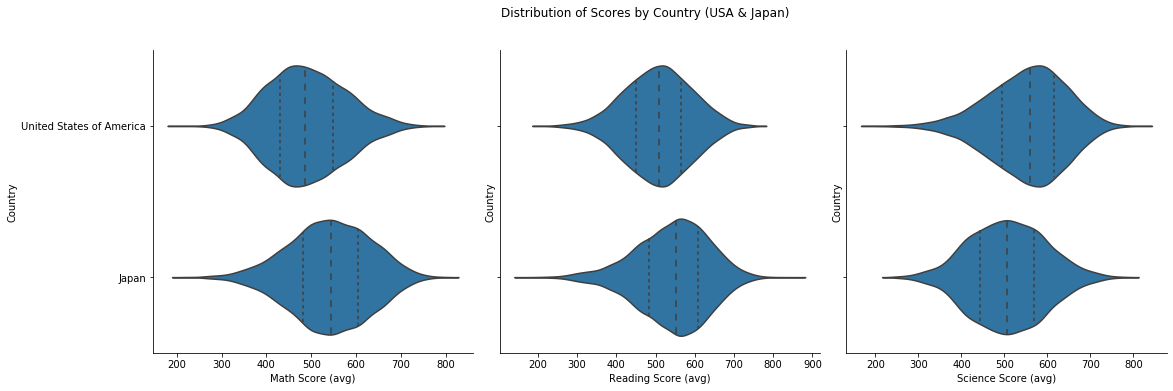

In [80]:
### use a pairplot function to comopare scores by country
g = sb.PairGrid(data = pisa_usajp, x_vars = ['math_avg','read_avg','scie_avg'],
                y_vars = ['country'], height=5);
g.map(sb.violinplot, inner = 'quartile');
g.set(ylabel= 'Country')
g.fig.suptitle("Distribution of Scores by Country (USA & Japan)", y=1.08);

# replace label names
replacements = {'math_avg': 'Math Score (avg)', 'read_avg': 'Reading Score (avg)',
                'scie_avg': 'Science Score (avg)', 'country': 'Country'}

for i in range(1):
    for j in range(3):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])

Observations from the chart:
- Japan has higher averages scores for Math and Reading compared to the United States.  This difference is the most pronounced in Math, where Japan surpasses the United States by around 50 points.
- United States has a higher average of Science scores.  Judging by the plot, United States surpasses Japan by around 50 points in regards to Science scores.

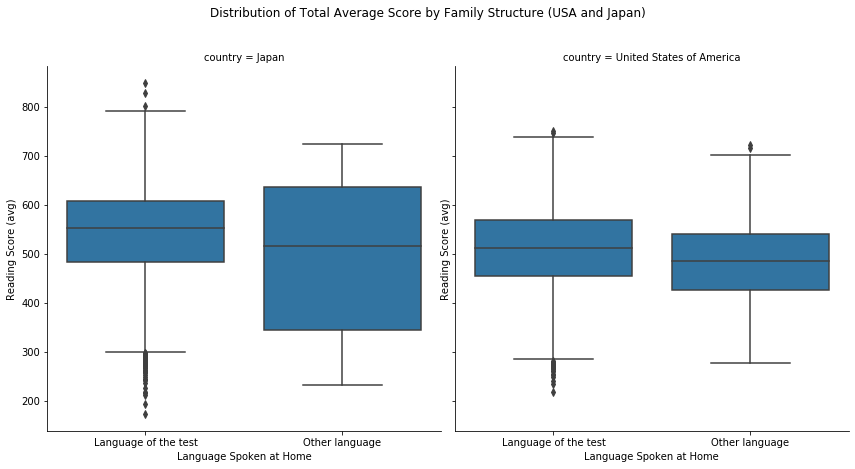

In [68]:
# plot
order = ['Language of the test', 'Other language']
g = sb.FacetGrid(data = pisa_usajp, col = 'country', height = 6)
g.map(sb.boxplot, 'intl_language_at_home', 'read_avg', order = order)
g.set(xlabel = 'Language Spoken at Home', ylabel= 'Reading Score (avg)')
g.fig.suptitle('Distribution of Total Average Score by Family Structure (USA and Japan)', y=1.08);

Looks like there a really wide distribution in Other language for Japan.  Most likely small sample?  Let's inspect the dataframe.

In [65]:
# check Japan sample size for Other language
pisa_usajp[(pisa_usajp.intl_language_at_home == "Other language") & (pisa_usajp.country == "Japan")].shape[0]

22

In [66]:
# compare to USA
pisa_usajp[(pisa_usajp.intl_language_at_home == "Other language") & (pisa_usajp.country == "United States of America")].shape[0]

577

Observation from the chart:
- Both USA and Japan have higher average reading scores if the student speaks that language of the test at home.  This seem to show that at least between Japan and United States, the trend is generally the same.
- Interestingly, Japan has a very wide distribution of scores for students who speak another language at home.  Upon inspection, this is because the sample size is quite small (only 22 entries).  Based on this, we're not sure how reliable that data is.

## Export Data

In [67]:
# run only once
# pisa_sub.to_csv(path_or_buf='pisa_global.csv')
# pisa_usajp.to_csv(path_or_buf='pisa_usajp.csv')